#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    



1.   MSE:                                   loss: 0.0253 - acc: 0.8284 - val_loss: 0.0375 - val_acc: 0.7311
2.   binary _crossentropy:       loss: 0.0120 - acc: 0.9231 - val_loss: 0.0368 - val_acc: 0.7371




# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [28]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [29]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [30]:
#模型編譯 MSE
model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

W0726 06:00:34.589648 140122137446272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [31]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

W0726 06:00:57.110490 140122137446272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 125s 3ms/step - loss: 0.0711 - acc: 0.4139 - val_loss: 0.0634 - val_acc: 0.5268
Epoch 2/12
37500/37500 [==============================] - 125s 3ms/step - loss: 0.0576 - acc: 0.5612 - val_loss: 0.0557 - val_acc: 0.6104
Epoch 3/12
37500/37500 [==============================] - 124s 3ms/step - loss: 0.0517 - acc: 0.6113 - val_loss: 0.0522 - val_acc: 0.6265
Epoch 4/12
37500/37500 [==============================] - 124s 3ms/step - loss: 0.0476 - acc: 0.6455 - val_loss: 0.0479 - val_acc: 0.6662
Epoch 5/12
37500/37500 [==============================] - 124s 3ms/step - loss: 0.0438 - acc: 0.6793 - val_loss: 0.0470 - val_acc: 0.6674
Epoch 6/12
37500/37500 [==============================] - 124s 3ms/step - loss: 0.0407 - acc: 0.7054 - val_loss: 0.0436 - val_acc: 0.6907
Epoch 7/12
37500/37500 [==============================] - 124s 3ms/step - loss: 0.0375 - acc: 0.7321 - val_loss: 0.0432 - 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

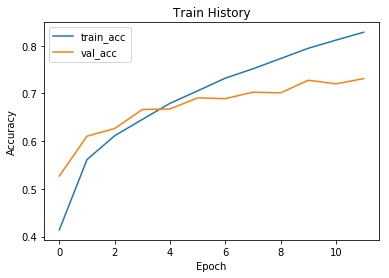

In [33]:
show_train_history('acc','val_acc')

In [0]:
#模型編譯 binary _crossentropy
model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

In [35]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0234 - acc: 0.8403 - val_loss: 0.0373 - val_acc: 0.7348
Epoch 2/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0216 - acc: 0.8554 - val_loss: 0.0375 - val_acc: 0.7318
Epoch 3/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0200 - acc: 0.8666 - val_loss: 0.0370 - val_acc: 0.7286
Epoch 4/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0185 - acc: 0.8771 - val_loss: 0.0361 - val_acc: 0.7417
Epoch 5/12
37500/37500 [==============================] - 125s 3ms/step - loss: 0.0175 - acc: 0.8848 - val_loss: 0.0364 - val_acc: 0.7399
Epoch 6/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0168 - acc: 0.8895 - val_loss: 0.0368 - val_acc: 0.7335
Epoch 7/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0157 - acc: 0.8968 - val_loss: 0.0366 - 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

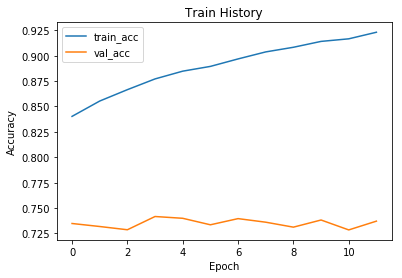

In [37]:
show_train_history('acc','val_acc')